In [1]:
import pickle
import os 
from itertools import product

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn')

from pycgp import single_mutation, point_mutation, probabilistic_mutation
from pycgp.gems import MatchByActiveStrategy, MatchPMStrategy, MatchSMStrategy

from utils import load_data, aggregate_statistics, plot_fitnesses, plot_distributions

This notebook interpret the results of basic run of symbolic regression - 30 applications of gems until it expires, replacement of the worst gem in jewellery box, 5 individuals in population.

# Aggregate statistics

In [21]:
mutations = [
        (single_mutation, MatchSMStrategy),
        (point_mutation, MatchPMStrategy),
        (probabilistic_mutation, MatchSMStrategy),
        (single_mutation, MatchByActiveStrategy),
        (probabilistic_mutation, MatchByActiveStrategy)]

folder = 'scripts/symbolic_15_pop/'
data = aggregate_statistics(folder, mutations)
data.head()

,mutation,strategy,gems,columns,best,mean,std,avg_gem_count,gem_better,gem_worse,bf,mf
0,single_mutation,MatchSMStrategy,0,10,0.341457,63373.042141,2.448942e+05,0.00,0.00,0.0,"[0.5994188998661174, 0.5691131977392645, 0.550...","[230.72767844593804, 22.02770214845057, 240061..."
1,single_mutation,MatchSMStrategy,0,50,0.303058,5018.124642,1.920410e+04,0.00,0.00,0.0,"[0.5981011203190091, 0.581604420396147, 0.5659...","[806778623.1002123, 12859.193622272755, 67277...."
2,single_mutation,MatchSMStrategy,0,100,0.263990,1706.897429,6.408941e+03,0.00,0.00,0.0,"[0.6087019749342198, 0.5843233366176341, 0.561...","[1.9443438438010055e+31, 727.5940100785971, 28..."
3,single_mutation,MatchSMStrategy,5,10,0.360618,305702.482790,1.183823e+06,5.50,80.15,30.7,"[0.6108177244084294, 0.5913792462329883, 0.589...","[1907.7747933499384, 34.16067809326501, 11.444..."
4,single_mutation,MatchSMStrategy,5,50,0.299687,3319.867253,1.155209e+04,5.35,36.95,28.2,"[0.6201942081662939, 0.5918812215317072, 0.582...","[2.0130009655847992e+29, 1245220.716697092, 11..."


In [22]:
data.groupby('gems').median()

,best,mean,std,avg_gem_count,gem_better,gem_worse
gems,,,,,,
0,0.263990,6.337304e+04,2.448942e+05,0.00,0.00,0.0
5,0.295233,1.326979e+07,4.316657e+07,5.70,45.10,29.8
10,0.296480,1.666912e+04,6.418070e+04,8.75,61.85,41.2


Overall, gems brough significant improvement in terms of best fitness achieved and mean of generation containing best fitness. Intersting observation is the slightly worse result in case of 10 gems.

Let's have a look at performance according to mutation and match strategy used.

In [17]:
data.groupby(['mutation', 'strategy']).mean()

best      mean  \
mutation               strategy                                    
point_mutation         MatchPMStrategy        0.296494  0.365021   
probabilistic_mutation MatchByActiveStrategy  0.206675  3.863456   
                       MatchSMStrategy        0.203568  5.604212   
single_mutation        MatchByActiveStrategy  0.328939  0.938731   
                       MatchSMStrategy        0.334669  0.720557   

                                                       std  avg_gem_count  \
mutation               strategy                                             
point_mutation         MatchPMStrategy        9.720575e+26       5.450000   
probabilistic_mutation MatchByActiveStrategy  3.146022e+09       5.505556   
                       MatchSMStrategy        9.825144e+06       4.488889   
single_mutation        MatchByActiveStrategy  1.215470e+09       7.716667   
                       MatchSMStrategy        1.200087e+10       4.777778   

                                              gem_better   gem_worse  
mutation               strategy                                       
point_mutation         MatchPMStrategy         99.316667   21.177778  
probabilistic_mutation MatchByActiveStrategy   22.516667  121.716667  
                       MatchSMStrategy          0.755556    1.450000  
single_mutation        MatchByActiveStrategy   43.977778  174.700000  
                       MatchSMStrategy         29.644444   18.977778

Best performance was achieved by probabilistic mutation, using match by all strategy. Let's have a look at its performance according to JBox size.

In [5]:
data[(data['mutation'] == 'probabilistic_mutation') & (data['strategy'] == 'MatchSMStrategy' )].iloc[:,:-2]

,mutation,strategy,gems,columns,best,mean,std,avg_gem_count,gem_better,gem_worse
18,probabilistic_mutation,MatchSMStrategy,0,10,0.238481,2.748975e+06,1.064638e+07,0.00,0.0,0.0
19,probabilistic_mutation,MatchSMStrategy,0,50,0.187785,6.616735e+04,2.528934e+05,0.00,0.0,0.0
20,probabilistic_mutation,MatchSMStrategy,0,100,0.195486,9.272417e+07,3.591059e+08,0.00,0.0,0.0
21,probabilistic_mutation,MatchSMStrategy,5,10,0.232810,2.387376e+05,9.244570e+05,4.80,3.7,5.6
22,probabilistic_mutation,MatchSMStrategy,5,50,0.187785,6.616735e+04,2.528934e+05,4.85,0.0,0.0
23,probabilistic_mutation,MatchSMStrategy,5,100,0.195486,9.272417e+07,3.591059e+08,4.95,0.0,0.0
24,probabilistic_mutation,MatchSMStrategy,10,10,0.236003,7.222146e+05,2.797072e+06,6.35,3.1,5.1
25,probabilistic_mutation,MatchSMStrategy,10,50,0.187785,6.616735e+04,2.528934e+05,8.30,0.0,0.0
26,probabilistic_mutation,MatchSMStrategy,10,100,0.195486,9.272417e+07,3.591059e+08,8.75,0.0,0.0


An interesting observation here: on larger graphs, no gems were actually used. This could by due to very low probability of match by all strategy on larger graph. Only on small graphs (size 10) the gems were applied. Positive fact is, that even small number of gems applications on those small graphs leads to better results. 

What about peformance of gems with match by active strategy?

Will we observe similar behaviour on Match By All strategy with single mutation?

In [6]:
data[(data['mutation'] == 'probabilistic_mutation') & (data['strategy'] == 'MatchByActiveStrategy' )].iloc[:,:-2]

,mutation,strategy,gems,columns,best,mean,std,avg_gem_count,gem_better,gem_worse
36,probabilistic_mutation,MatchByActiveStrategy,0,10,0.238481,2.748975e+06,1.064638e+07,0.00,0.00,0.00
37,probabilistic_mutation,MatchByActiveStrategy,0,50,0.187785,6.616735e+04,2.528934e+05,0.00,0.00,0.00
38,probabilistic_mutation,MatchByActiveStrategy,0,100,0.195486,9.272417e+07,3.591059e+08,0.00,0.00,0.00
39,probabilistic_mutation,MatchByActiveStrategy,5,10,0.199155,6.769339e+08,2.621754e+09,7.65,45.10,166.40
40,probabilistic_mutation,MatchByActiveStrategy,5,50,0.210710,1.540821e+10,5.967552e+10,7.20,26.25,153.00
41,probabilistic_mutation,MatchByActiveStrategy,5,100,0.231058,6.249516e+08,2.420422e+09,7.60,34.70,169.85
42,probabilistic_mutation,MatchByActiveStrategy,10,10,0.195051,1.979063e+03,7.617048e+03,8.05,44.05,178.70
43,probabilistic_mutation,MatchByActiveStrategy,10,50,0.172671,1.666912e+04,6.418070e+04,9.45,31.95,210.80
44,probabilistic_mutation,MatchByActiveStrategy,10,100,0.205955,2.310225e+12,8.947462e+12,8.60,30.75,186.70


In [7]:
data[(data['mutation'] == 'single_mutation') & (data['strategy'] == 'MatchSMStrategy' )].iloc[:,:-2]

,mutation,strategy,gems,columns,best,mean,std,avg_gem_count,gem_better,gem_worse
0,single_mutation,MatchSMStrategy,0,10,0.341457,6.337304e+04,2.448942e+05,0.00,0.00,0.00
1,single_mutation,MatchSMStrategy,0,50,0.303058,5.018125e+03,1.920410e+04,0.00,0.00,0.00
2,single_mutation,MatchSMStrategy,0,100,0.263990,1.706897e+03,6.408941e+03,0.00,0.00,0.00
3,single_mutation,MatchSMStrategy,5,10,0.360618,3.057025e+05,1.183823e+06,5.50,80.15,30.70
4,single_mutation,MatchSMStrategy,5,50,0.299687,3.319867e+03,1.155209e+04,5.35,36.95,28.20
5,single_mutation,MatchSMStrategy,5,100,0.310554,7.355849e+19,2.848908e+20,5.45,26.70,29.75
6,single_mutation,MatchSMStrategy,10,10,0.354334,5.132243e+03,1.985248e+04,7.70,86.60,41.20
7,single_mutation,MatchSMStrategy,10,50,0.320507,2.991156e+02,1.147852e+03,9.75,62.10,40.95
8,single_mutation,MatchSMStrategy,10,100,0.306891,1.698543e+17,6.578427e+17,10.55,57.15,42.70


Here, when it comes to 5 gems,the results are slightly better, in 10 gems case, the results are however slightly worse.

So we see, that best performance can be achieved by probabilistic mutation and match by all strategy and gems can further improve this performance, albeit slightly. Let's see which mutation performed worst and see effect of gems on this settings.

In [8]:
data[data.gems == 0].groupby('mutation').mean()

,best,mean,std,avg_gem_count,gem_better,gem_worse
mutation,,,,,,
point_mutation,0.353034,3.988369e+03,1.544338e+04,0.0,0.0,0.0
probabilistic_mutation,0.207251,3.184644e+07,1.233351e+08,0.0,0.0,0.0
single_mutation,0.302835,2.336602e+04,9.016910e+04,0.0,0.0,0.0


As with *remove oldest* gem removal, worse performance was provided by single mutation. Let's have a closer look at that.

In [9]:
data[(data['mutation'] == 'single_mutation')].groupby(['strategy', 'gems']).mean()

best           mean           std  \
strategy              gems                                          
MatchByActiveStrategy 0     0.302835   2.336602e+04  9.016910e+04   
                      5     0.308624  2.438086e+285  2.892400e+34   
                      10    0.346636   6.178141e+04  2.364606e+05   
MatchSMStrategy       0     0.302835   2.336602e+04  9.016910e+04   
                      5     0.323620   2.451950e+19  9.496360e+19   
                      10    0.327244   5.661809e+16  2.192809e+17   

                            avg_gem_count  gem_better   gem_worse  
strategy              gems                                         
MatchByActiveStrategy 0          0.000000    0.000000    0.000000  
                      5          9.716667   66.883333  218.716667  
                      10        11.566667   73.950000  250.216667  
MatchSMStrategy       0          0.000000    0.000000    0.000000  
                      5          5.433333   47.933333   29.550000  
                      10         9.333333   68.616667   41.616667

Interesting property is the worse performance of match by all strategy, when using 10 JBox size. We do not see this in case of *oldest removal*. Other than that, runs with gems yielded better results on average.

Let's plot the average best fitness of probabilistic and single mutations.

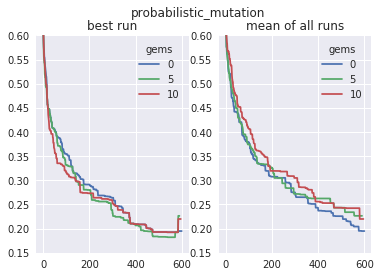

In [18]:
plot_fitnesses(data, 'probabilistic_mutation', (0.15, 0.6))

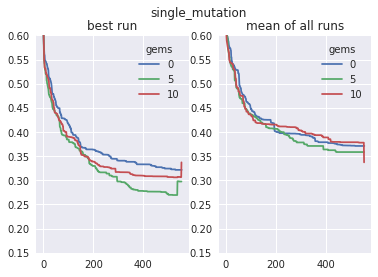

In [19]:
plot_fitnesses(data, 'single_mutation', (0.15, 0.6))

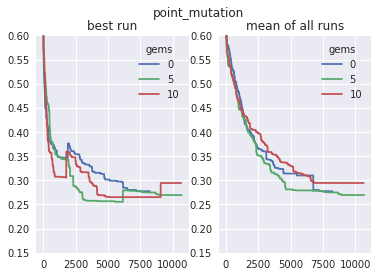

In [20]:
plot_fitnesses(data, 'point_mutation', (0.15, 0.6))

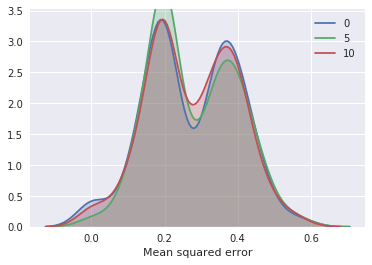

In [13]:
ax = plot_distributions(folder, mutations)
ax.set_xlabel('Mean squared error')
plt.savefig('test.pdf', format='pdf', dpi=1000)

# Conclusion

Gems were able to improve performance in almost all instances of experiment. Best performance overall was achieved by 